## Recadrage des images

Taille attendue : 200x200.

In [23]:
from torchvision.transforms import functional as F
from PIL import Image
import math

def preprocess_image(image, target_size=(200, 200), crop="lower", left_offset=0, top_offset=0):
    """
    Prétraite une image en la convertissant en nuances de gris, puis en la redimensionnant et la recadrant selon les paramètres donnés.
    :param image: Image à traiter
    :param target_size: Taille cible de l'image
    :param crop: Position du crop (lower ou center)
    :param left_offset: Décalage à appliquer à gauche
    :param top_offset: Décalage à appliquer en haut
    """

    # Convertir en nuances de gris
    image_gray = F.to_grayscale(image, num_output_channels=1)

    # Caclul des différences de taille entre l'image et la taille cible
    width, height = image_gray.size
    width_delta = (width - target_size[0])
    height_delta = (height - target_size[1])

    # L'image est centrée dans sa longueur, on calcule le crop à appliquer (floor et ceil pour corriger les erreurs d'arrondi)
    left = math.floor(width_delta / 2)
    right = math.ceil(width - width_delta / 2)

    # L'image peut être centrée ou plaquée sur le bas (afin de garder au maximum la ligne blanche)
    if crop == "lower":
        top = height_delta
        bottom = height
    else:
        top = math.floor(height_delta / 2)
        bottom = math.ceil(height - height_delta / 2)

    # Calcul du crop final et applique l'offset si besoin
    crop = (left + left_offset, top + top_offset, right + left_offset, bottom + top_offset)
    return image_gray.crop(crop)

In [24]:
raw_image = Image.open('scotch/img1.png')
processed_image = preprocess_image(raw_image, left_offset=30)

(92, 44, 292, 244)


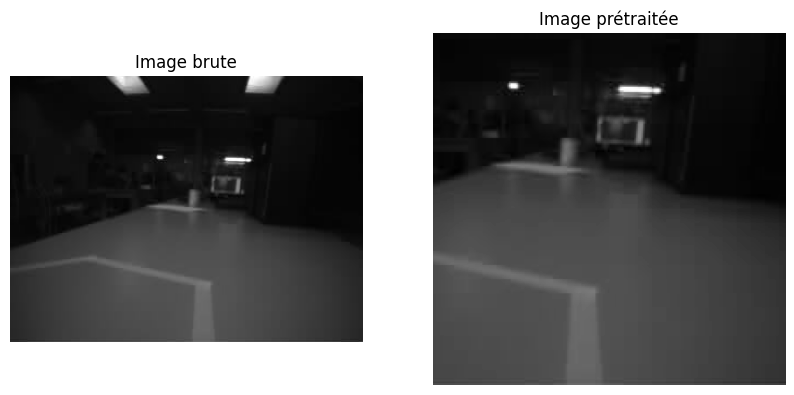

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(raw_image)
plt.title('Image brute')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title('Image prétraitée')
plt.axis('off')
plt.show()